In [1]:
import collections
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Grid search (R code 2.3)

In [2]:
num_grid_points = 20
def calculate_posterior(num_grid_points, k, n, make_prior):
    p_grid = np.linspace(start=0, stop=1, num=num_grid_points)
    prior = make_prior(p_grid) #np.ones((num_grid_points,))
    likelihood = scipy.stats.binom.pmf(k=k, n=n, p=p_grid)
    posterior = (likelihood * prior) 
    posterior /= sum(posterior)
    return (p_grid, posterior)

def visualize_posterior(data, xlabel):
    figure = plt.figure(figsize=(20, 10))
    ax = figure.add_subplot(111)
    p_grid, posterior = data
    ax.plot(p_grid, posterior, 'o')
    ax.plot(p_grid, posterior, color='k')
    ax.set_title('{0} points'.format(len(p_grid)))
    ax.set_ylabel('posterior probability')
    ax.set_xlabel(xlabel)
    return ax

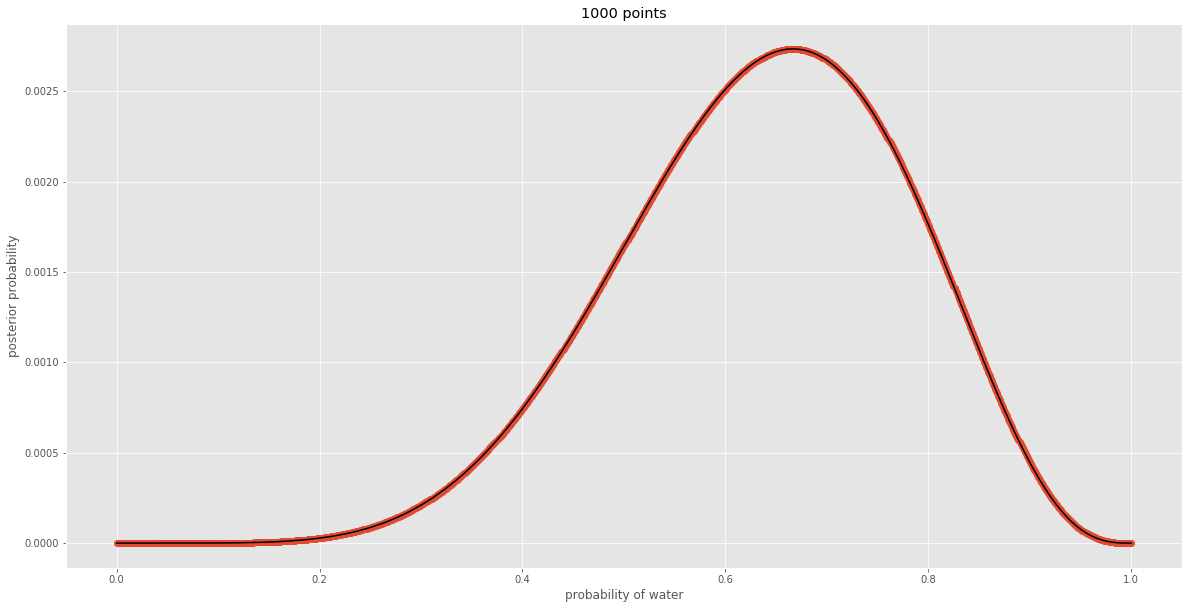

In [3]:
uniform_prior = lambda x: np.ones(x.shape)
step_prior = lambda x: np.where(x < 0.5, 0, 1)
exp_prior = lambda x: np.exp( -5 * np.abs(x - 0.5))   
grid, posterior = calculate_posterior(1000, 6, 9, uniform_prior)
visualize_posterior((grid, posterior), 'probability of water')

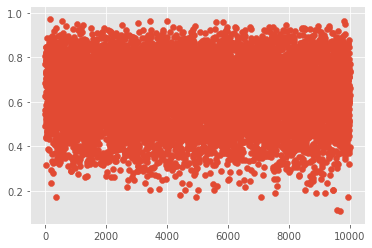

In [4]:
samples = np.random.choice(grid, size=10000, p=posterior, replace=True)
plt.scatter(range(10000), samples)#, 'o')

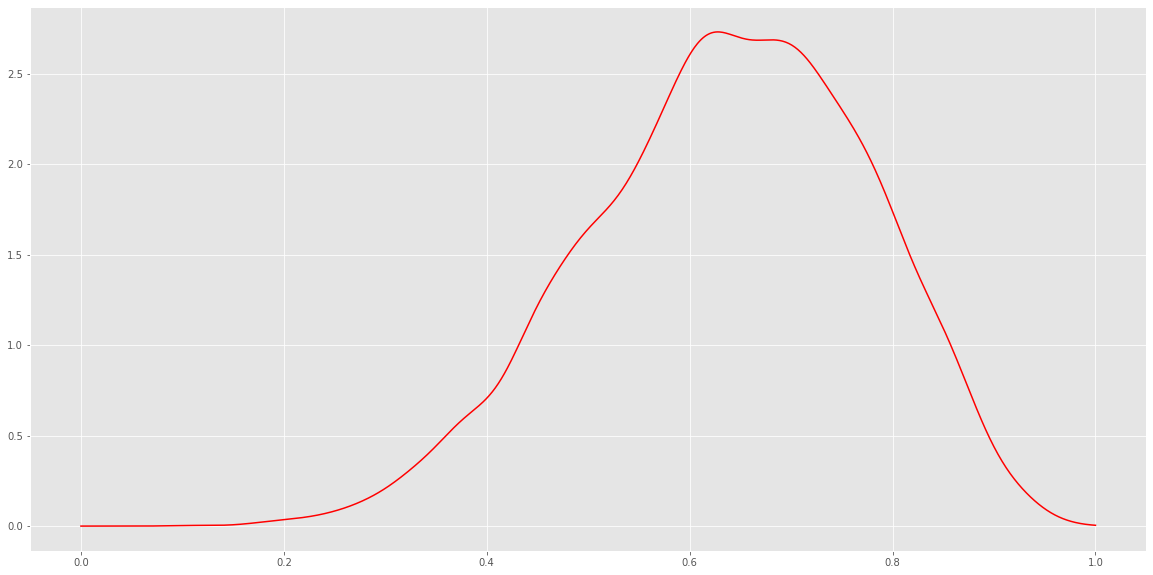

In [5]:
figure = plt.figure(figsize=(20, 10))
ax = figure.add_subplot(111)
x  = np.linspace(start=0, stop=1, num=1000)
ax.plot(x, scipy.stats.gaussian_kde(samples).evaluate(x), 'r')

In [6]:
grid, posterior = calculate_posterior(1000, 3, 3, uniform_prior)
samples = np.random.choice(grid, size=10000, p=posterior, replace=True)
np.mean(samples), np.median(samples)

(0.8008625625625626, 0.8428428428428428)

In [7]:
loss = np.fromiter(map(lambda x: sum(posterior * abs(x - grid)), grid), dtype=np.float)
grid[np.argmin(loss)]

0.8408408408408409

In [8]:
def simple_histogram(samples):
    # x is a array/ list of integers
    counts = collections.Counter(samples)
    x, y = np.fromiter(counts.keys(), dtype=int), np.fromiter(counts.values(), dtype=int)
    figure = plt.figure(figsize=(20, 10))
    ax = figure.add_subplot(111)
    ax.bar(x, y, width=0.1)
    return ax

In [9]:
def hdpi(samples, coverage):
    # lazy / approximate implementation of hdpi
    search = np.linspace(min(samples), max(samples), num=1000)
    required = int(np.ceil(coverage * len(samples)))
    sorted_samples = np.array(sorted(samples)) # sort the samples
    def get_required_length(lb):
        sub_sample = sorted_samples[sorted_samples > lb]
        if len(sub_sample) >= required:
            ub = sub_sample[required]
            return (ub, lb, ub - lb)
        else:
            return None
    prediction_intervals = {l[2]: (l[1], l[0]) for l in filter(None, map(get_required_length, search))}
    return prediction_intervals[min(prediction_intervals.keys())]



In [10]:
hdpi(samples, 0.5)

(0.8420402384366348, 1.0)

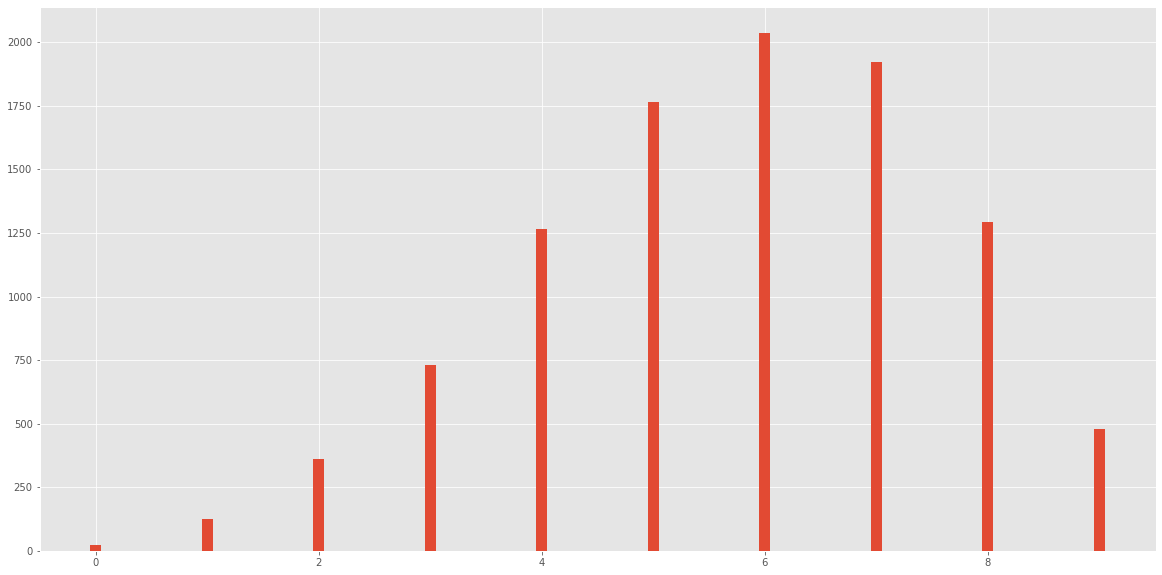

In [11]:
grid, posterior = calculate_posterior(1000, 6, 9, uniform_prior)
samples = np.random.choice(grid, size=10000, p=posterior, replace=True)
simulated_samples = scipy.stats.binom.rvs(n=9, p=samples)
simple_histogram(simulated_samples)

In [12]:
birth1 = (1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,  0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,  1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,  1,0,1,1,1,0,1,1,1,1) 
birth2 = (0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,  1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,  1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,  0,0,0,1,1,1,0,0,0,0) 
assert sum(birth1) + sum(birth2) == 111
assert len(birth1) + len(birth2) == 200
birth1 = np.array(birth1)
birth2 = np.array(birth2)

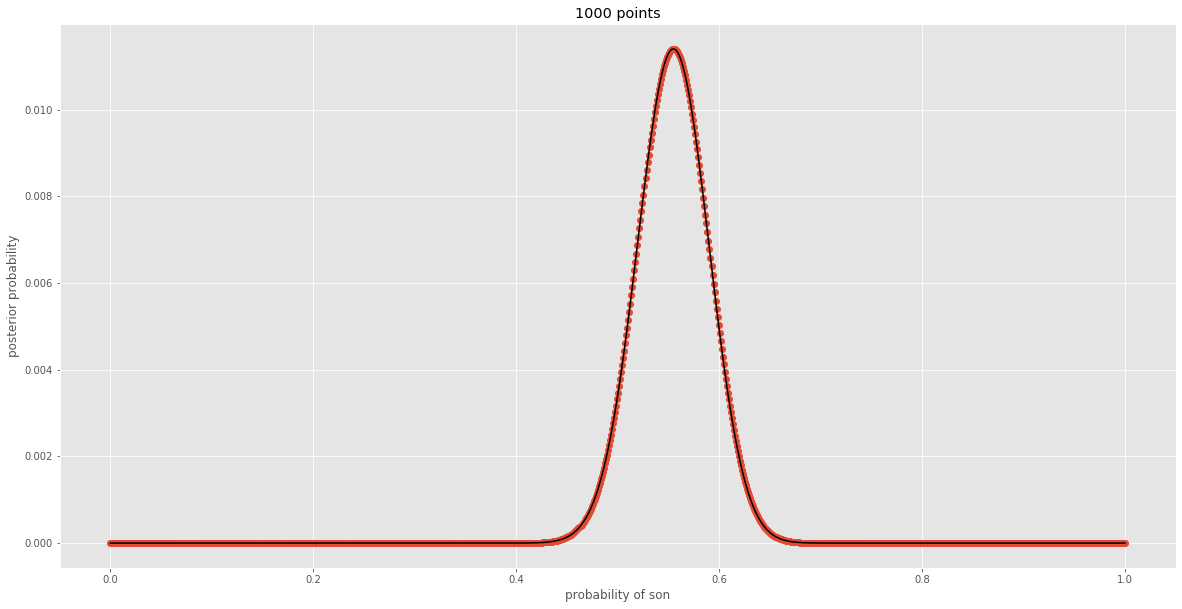

In [13]:
grid, posterior = calculate_posterior(1000, 111, 200, uniform_prior)
visualize_posterior((grid, posterior), 'probability of son')
samples = np.random.choice(grid, size=10000, p=posterior, replace=True)

In [14]:
#3H1
grid[np.argmax(posterior)]

0.5545545545545546

In [15]:
#3H2
print('50%', hdpi(samples, 0.5))
print('89%', hdpi(samples, 0.89))
print('97%', hdpi(samples, 0.97))

50% (0.5315044774504234, 0.5775775775775776)
89% (0.5014744474203934, 0.6106106106106106)
97% (0.4744203663122582, 0.6236236236236237)


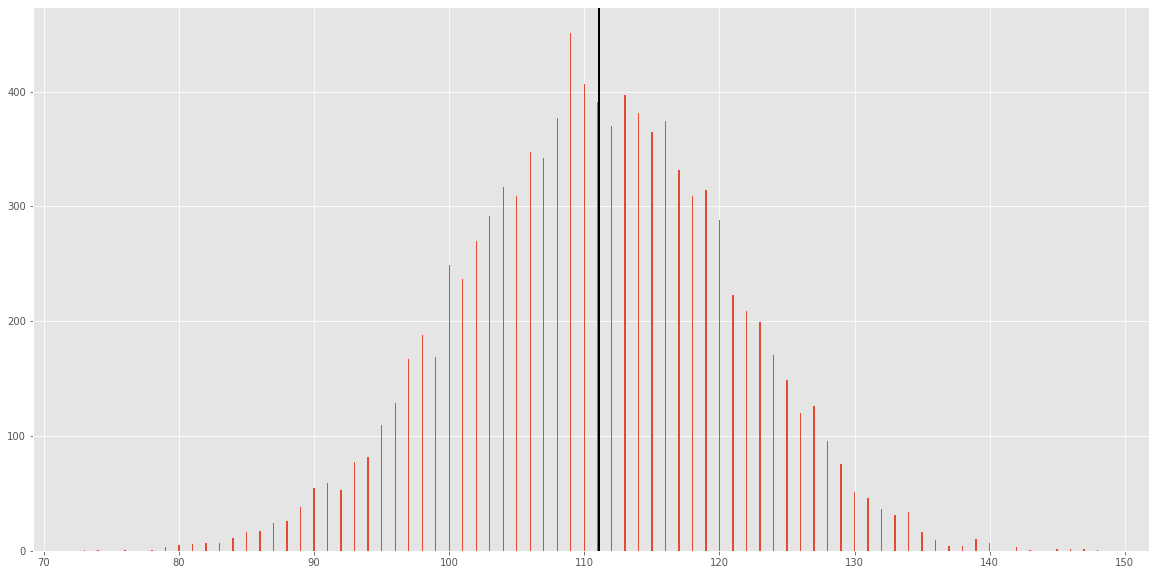

In [20]:
#3H3
simulated_samples = scipy.stats.binom.rvs(n=200, p=samples)
ax = simple_histogram(simulated_samples)
ax.axvline(111.1, color='k', linewidth=2)

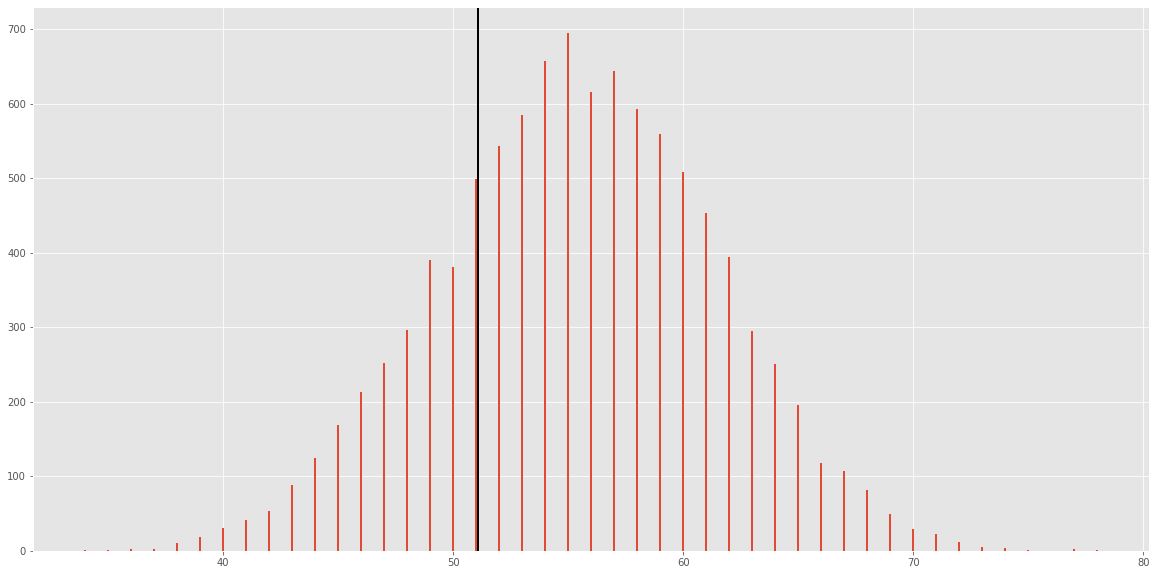

In [19]:
#3H3
simulated_samples = scipy.stats.binom.rvs(n=100, p=samples)
ax = simple_histogram(simulated_samples)
ax.axvline(sum(birth1)+0.1, color='k', linewidth=2)

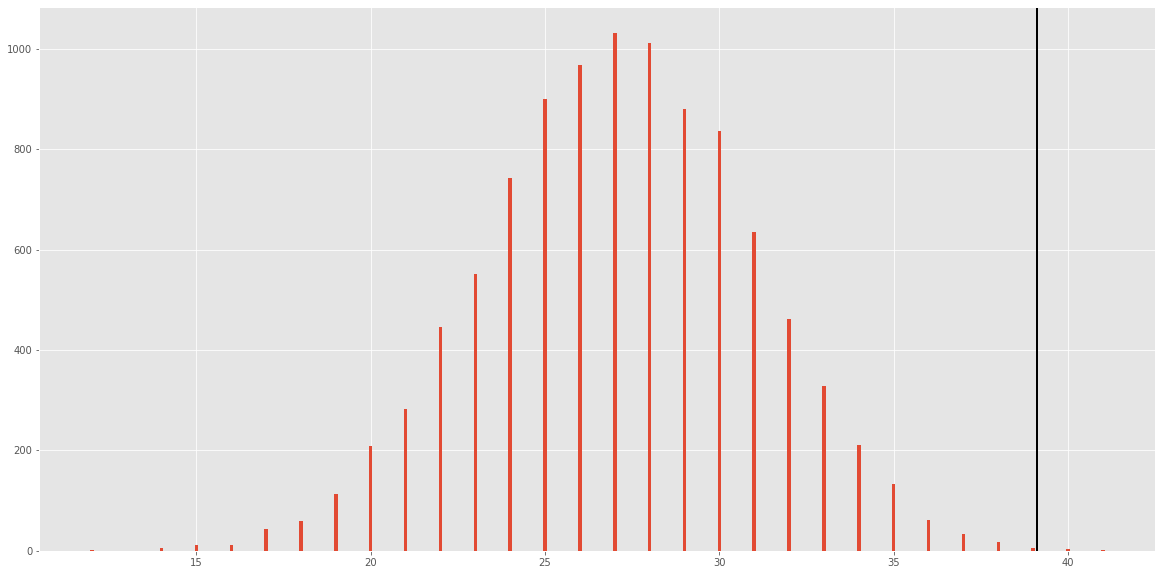

In [21]:
#3H4
# number of families where the first born was a girl
simulated_samples = scipy.stats.binom.rvs(n=len(birth1) - sum(birth1), p=samples)
# observed number
obs = sum(birth2[birth1==0]) # sum of the boys in families where first birth is a girl
ax = simple_histogram(simulated_samples)
ax.axvline(obs+0.1, color='k', linewidth=2)

In [ ]:
ß